In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [151]:
df=pd.read_csv('medical_cost_insurance.csv')

In [152]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [153]:
#getting top 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [154]:
#getting bottom 10 rows
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [155]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [156]:
#Above observed that no null values are presebt in the dataset

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [158]:
#Observed that there are 2 columns of float dtype
#2 columns of int datatype
#2 columns of object(string values)data type

In [159]:
for i in df:
    print(df[i].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
       

In [160]:
#checking duplicacy in data
duplicate=df.duplicated()
print(duplicate.sum())

1


In [161]:
#dropping d_uplicated row as only 1 row is present
df.drop_duplicates(inplace=True)

In [162]:
df.shape

(1337, 7)

In [163]:
#seperating numeric columns and categoric columns
num=[]
cat=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        cat.append(i)
    else:
        num.append(i)

In [164]:
cat

['sex', 'smoker', 'region']

In [165]:
num

['age', 'bmi', 'children', 'charges']

In [166]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [167]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [168]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [169]:
#from above observation
#age has no of unique values 47 out of 1337
#while charges has No unique values as the data is continous in target variable,hence it is the Regression problem

In [170]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [171]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [172]:
#data is normally skewed
#few outliers are present in age and bmi column

In [173]:
#Encoding Datai.e categorical columns encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


EDA--GRaphical Analysis

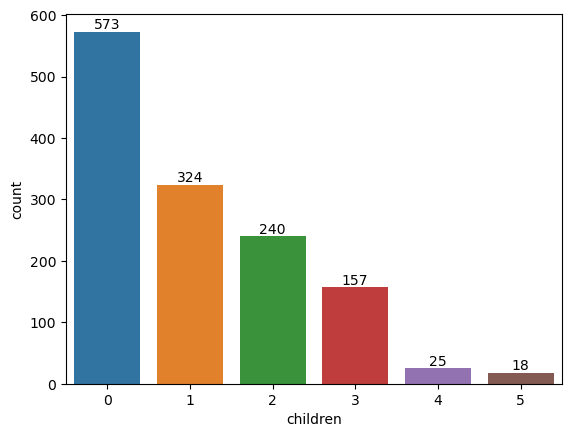

In [174]:
ax=sns.countplot(x='children',data=df)
for c in ax.containers:
    plt.bar_label(c)

In [175]:
#We observe that there are no children in large numbers ,more no of children is very less for insurance

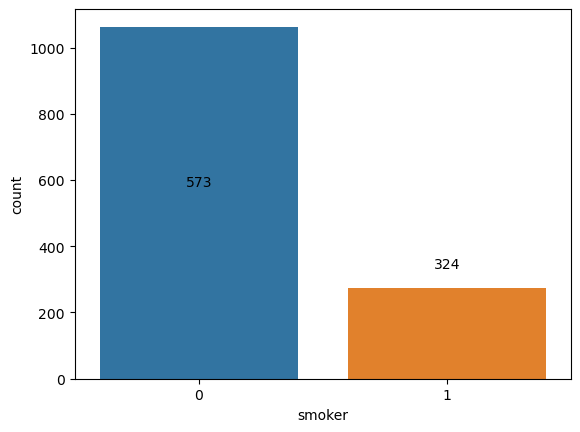

In [176]:
sns.countplot(x='smoker',data=df)
for c in ax.containers:
    plt.bar_label(c)


In [177]:
#there are more no of smokers 'No' who have applied for insurance

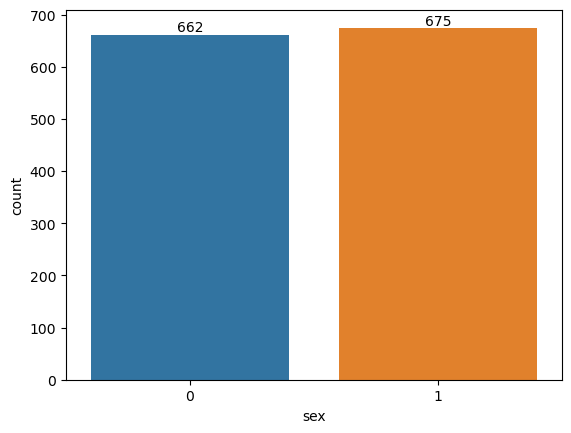

In [178]:
ax=sns.countplot(data=df,x='sex')
for c in ax.containers:
    plt.bar_label(c)

In [179]:
#almost equal no of male and feamles have applied for medical insurance

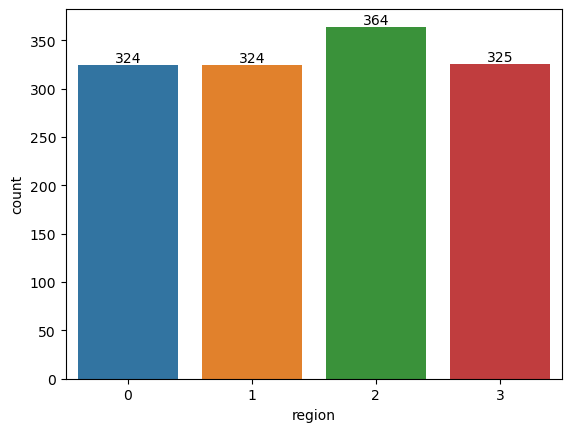

In [180]:

ax=sns.countplot(x='region',data=df)
for c in ax.containers:
    plt.bar_label(c)

In [181]:
##southeast region have applied more for insuarnce
#while other regions have equally applied ofr insurance

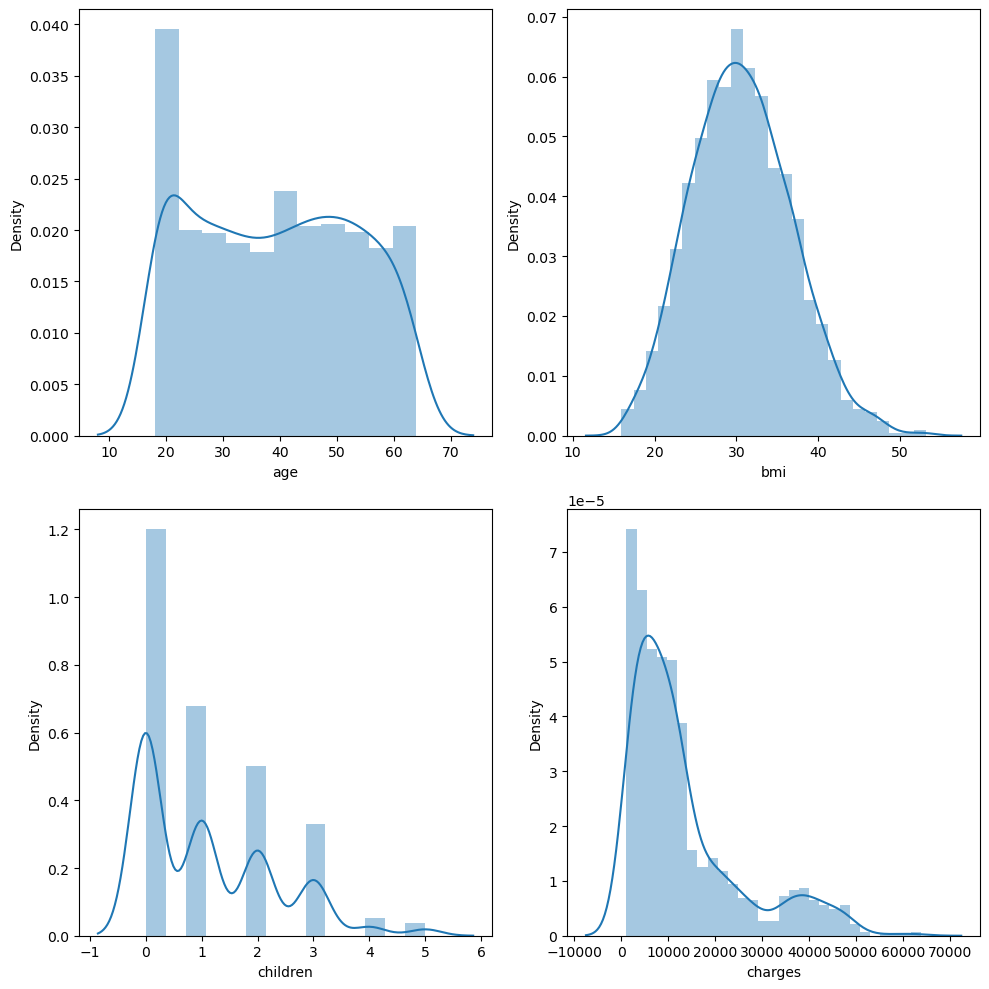

In [182]:
#distribution plot
plt.figure(figsize=(10,10))
p=1
for i in num:
    if p<=4:
        plt.subplot(2,2,p)
        sns.distplot(df[i])
    p+=1
plt.tight_layout()

In [183]:
#we observe that data in charges which is target variable has right skewed data
#other columns bmi,children have normal distribution

In [184]:
#BIvariate Analysis

In [185]:
print(cat)
print(num)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


<Axes: xlabel='sex', ylabel='charges'>

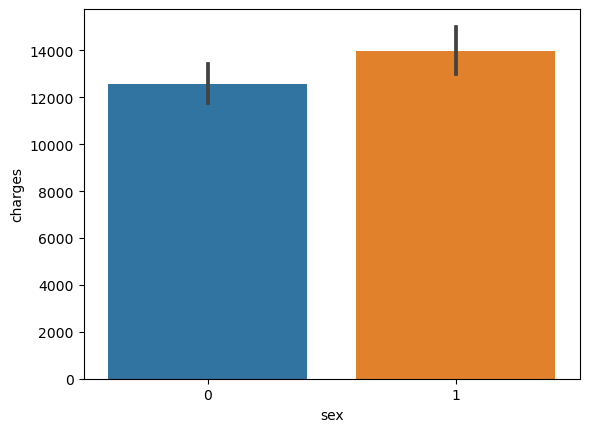

In [186]:
sns.barplot(x='sex',y='charges',data=df)

In [187]:
#male has high ratio paying for more insurance charges

<Axes: xlabel='smoker', ylabel='charges'>

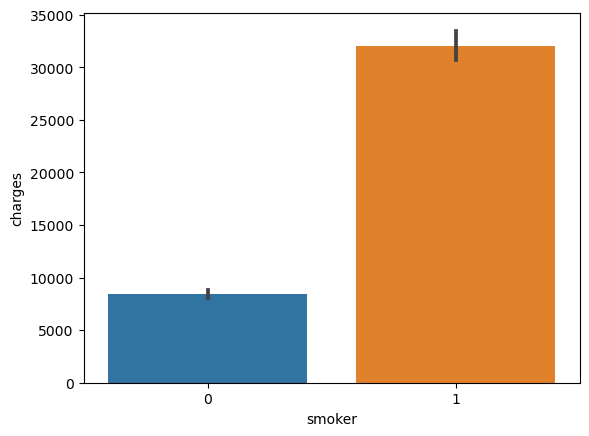

In [188]:
sns.barplot(x='smoker',y='charges',data=df)

In [189]:
#people who are smokers have high insurance charges
#while Non smokers have less insurance charges

<Axes: xlabel='region', ylabel='charges'>

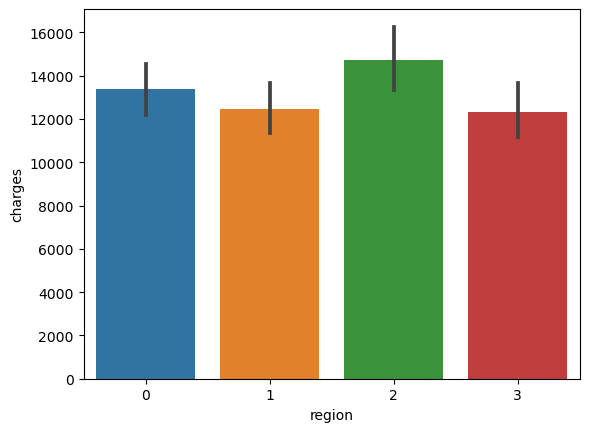

In [190]:
sns.barplot(x='region',y='charges',data=df)

In [191]:
#southeast region shows that thay have paid high charges for insurance
#while other regions shows that almost equal charges of insurance paid by them

<Axes: xlabel='children', ylabel='age'>

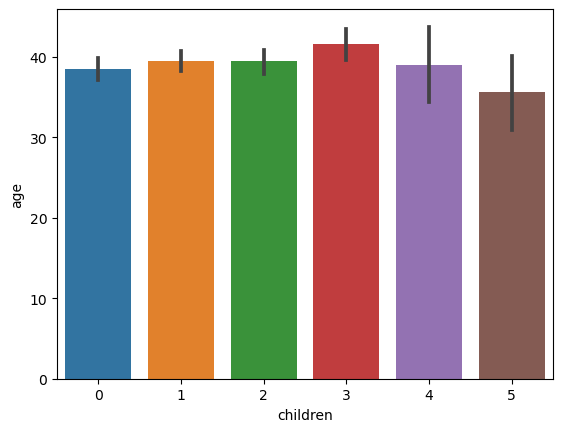

In [192]:
sns.barplot(x='children',y='age',data=df)

In [193]:
#we observe that children with more age spend more on insurance charges

<Axes: xlabel='region', ylabel='charges'>

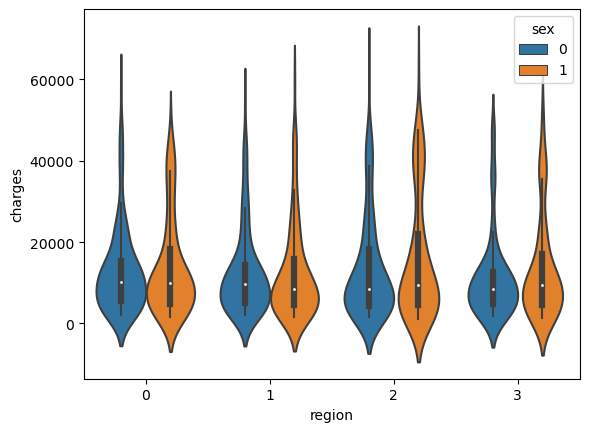

In [194]:
sns.violinplot(x='region',y='charges',data=df,hue='sex')

In [195]:
#southeast region have equal female and male people paying for insurance charges
#while in northeast region the ration of female is more than male paying for insurance charges

<Axes: xlabel='children', ylabel='charges'>

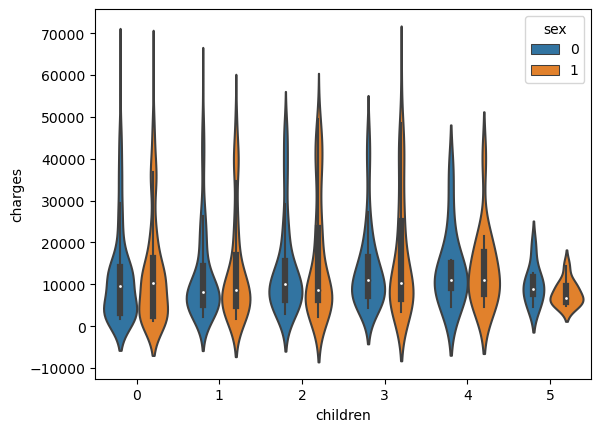

In [196]:
sns.violinplot(x='children',y='charges',data=df,hue='sex')

In [197]:
#people with no children are paying  higher charges
#people with 2,3,4 and 5 children are paying less insurance charges


<Axes: xlabel='sex', ylabel='charges'>

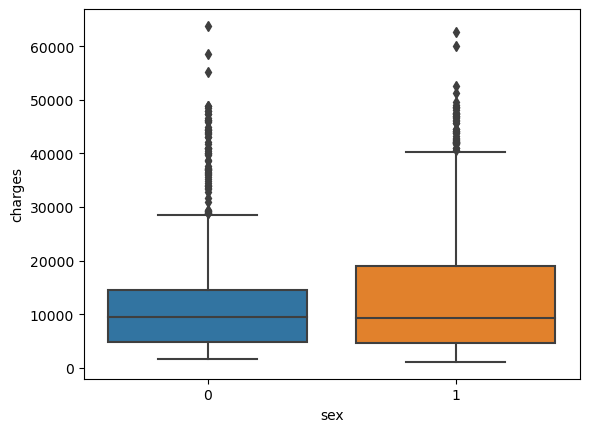

In [198]:
sns.boxplot(x='sex',y='charges',data=df)

In [199]:
#outliers are present in data

<Axes: xlabel='children', ylabel='charges'>

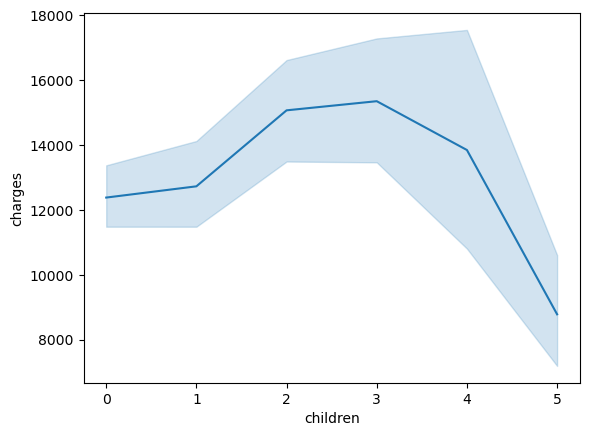

In [200]:
sns.lineplot(x='children',y='charges',data=df)

In [201]:
#people with 2 and 3 childrens have paid high amount for insurance

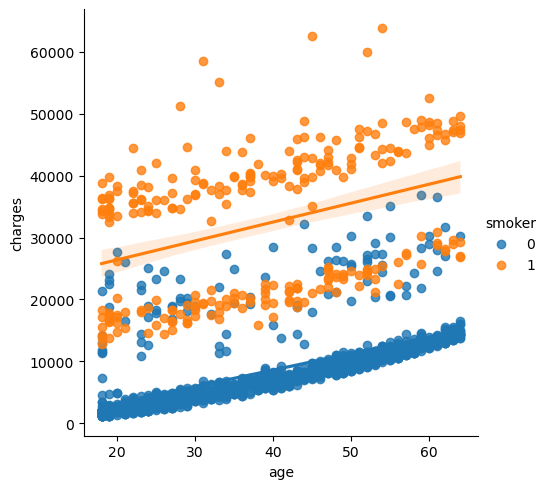

In [202]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df)

In [203]:
#observe that Non smoker pay more for insuarnce chrges
#while increased no of smokers pay more than smokers for insurance charges


In [204]:
#Multivariate Analysis

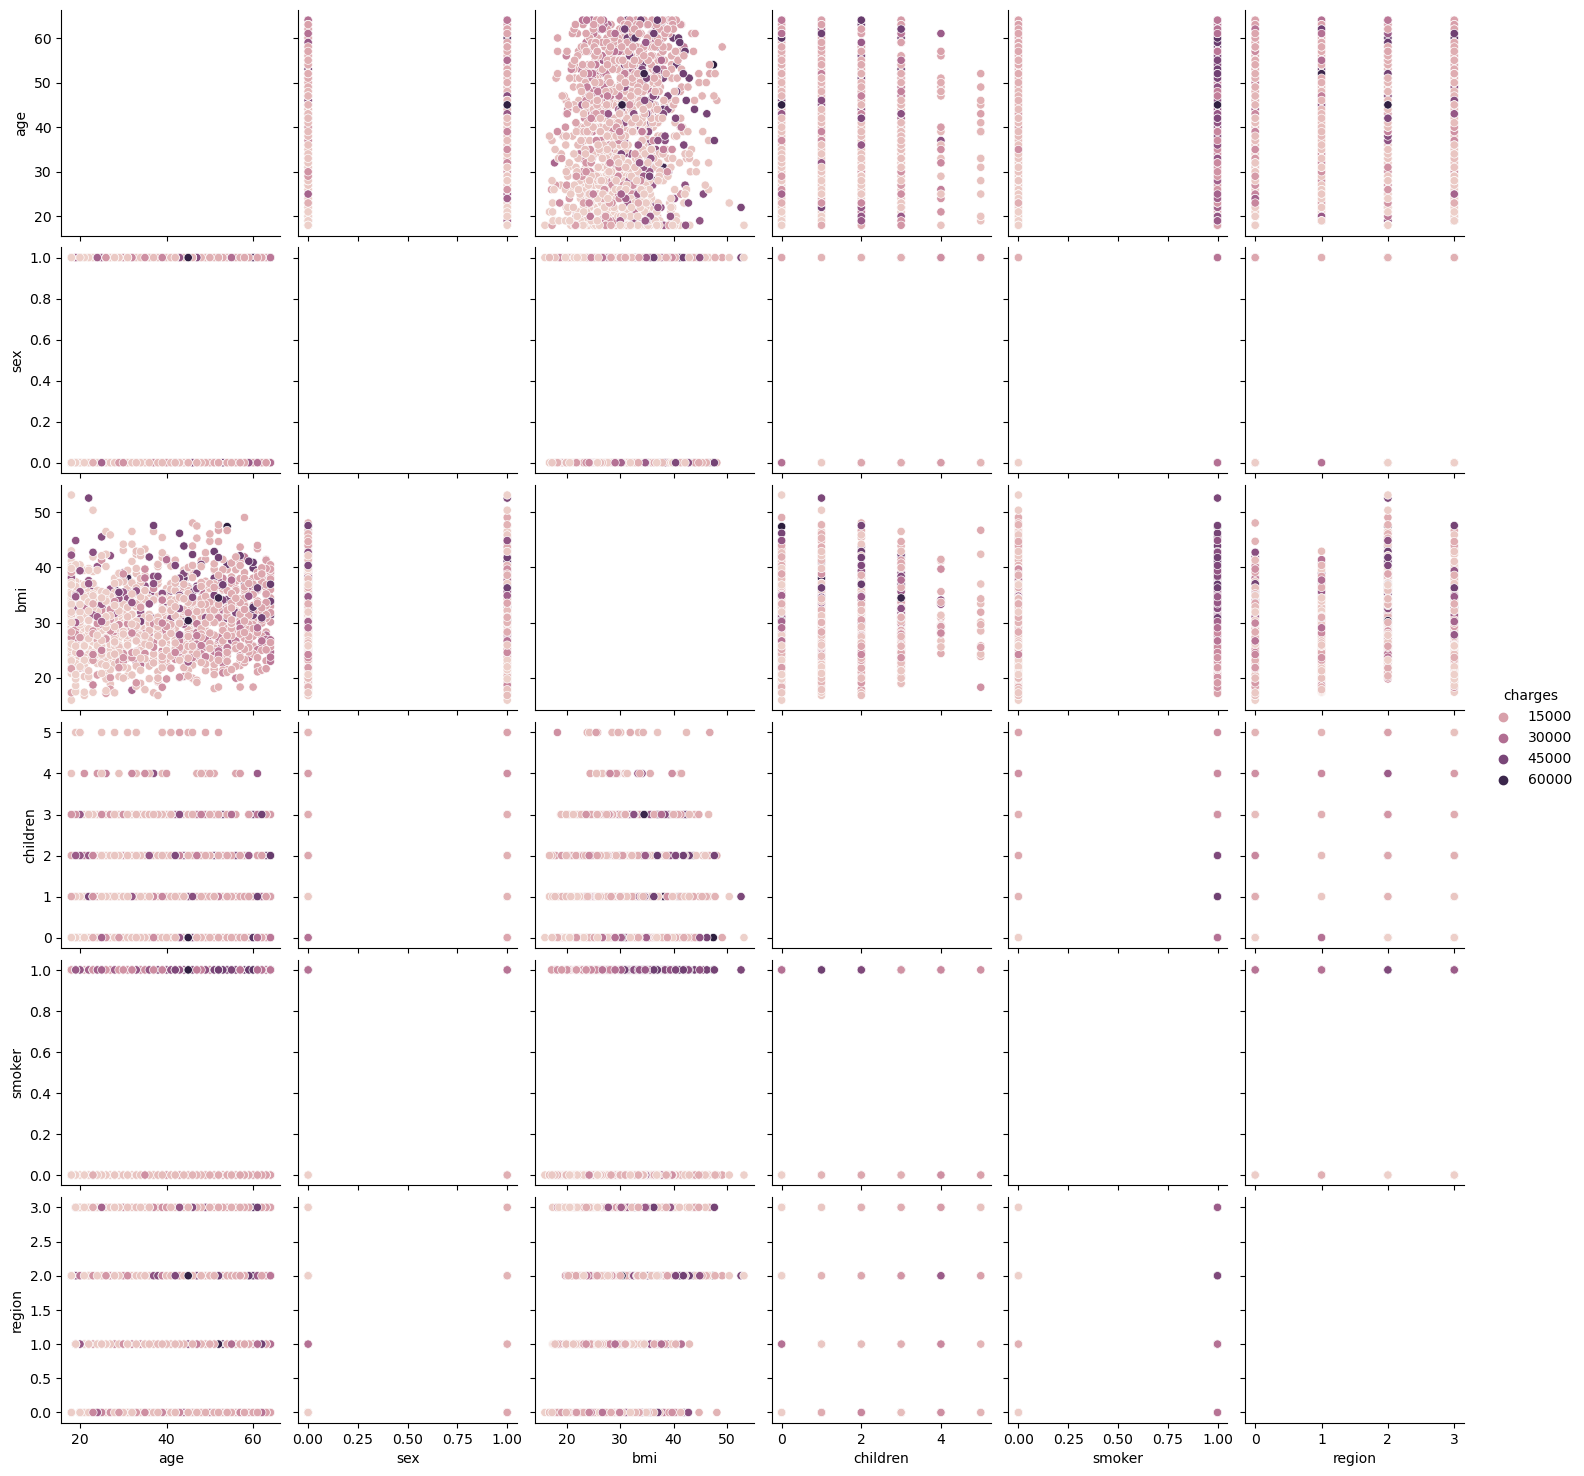

In [205]:
sns.pairplot(df,hue='charges')

In [206]:
#checking skewness

In [207]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

<Axes: xlabel='charges', ylabel='Density'>

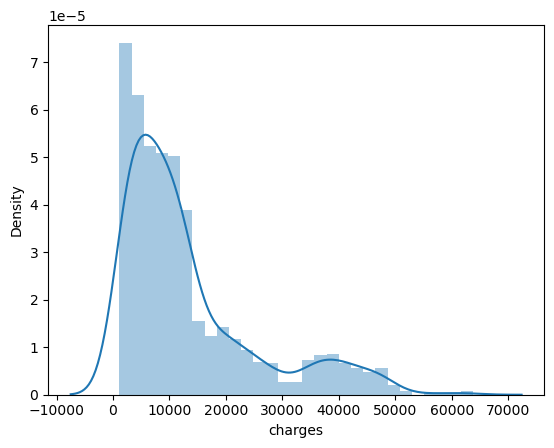

In [208]:
sns.distplot(df['charges'])

In [209]:
#dta in taget is skwed towrds right
#removing sjewness using squarerrottransformation

In [210]:
df['charges']=np.sqrt(df['charges'])

In [211]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     0.795995
dtype: float64

<Axes: xlabel='smoker', ylabel='Density'>

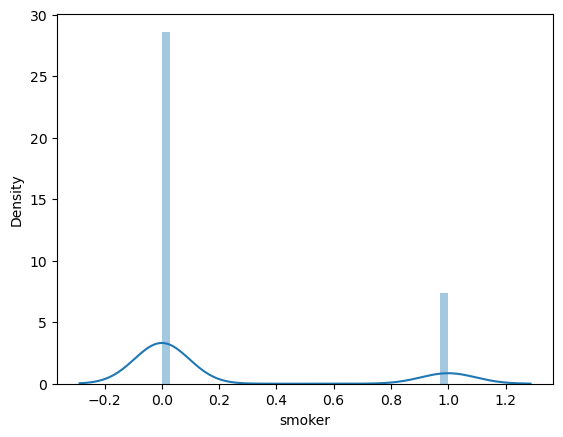

In [212]:
sns.distplot(df['smoker'])

In [213]:
#as smoker has categorical data no need to remove skewness

In [214]:
#correlation
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.409672
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.037950
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.167888
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.106222
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.756065
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.023931
charges,0.409672,0.037950,0.167888,0.106222,0.756065,-0.023931,1.000000


<Axes: >

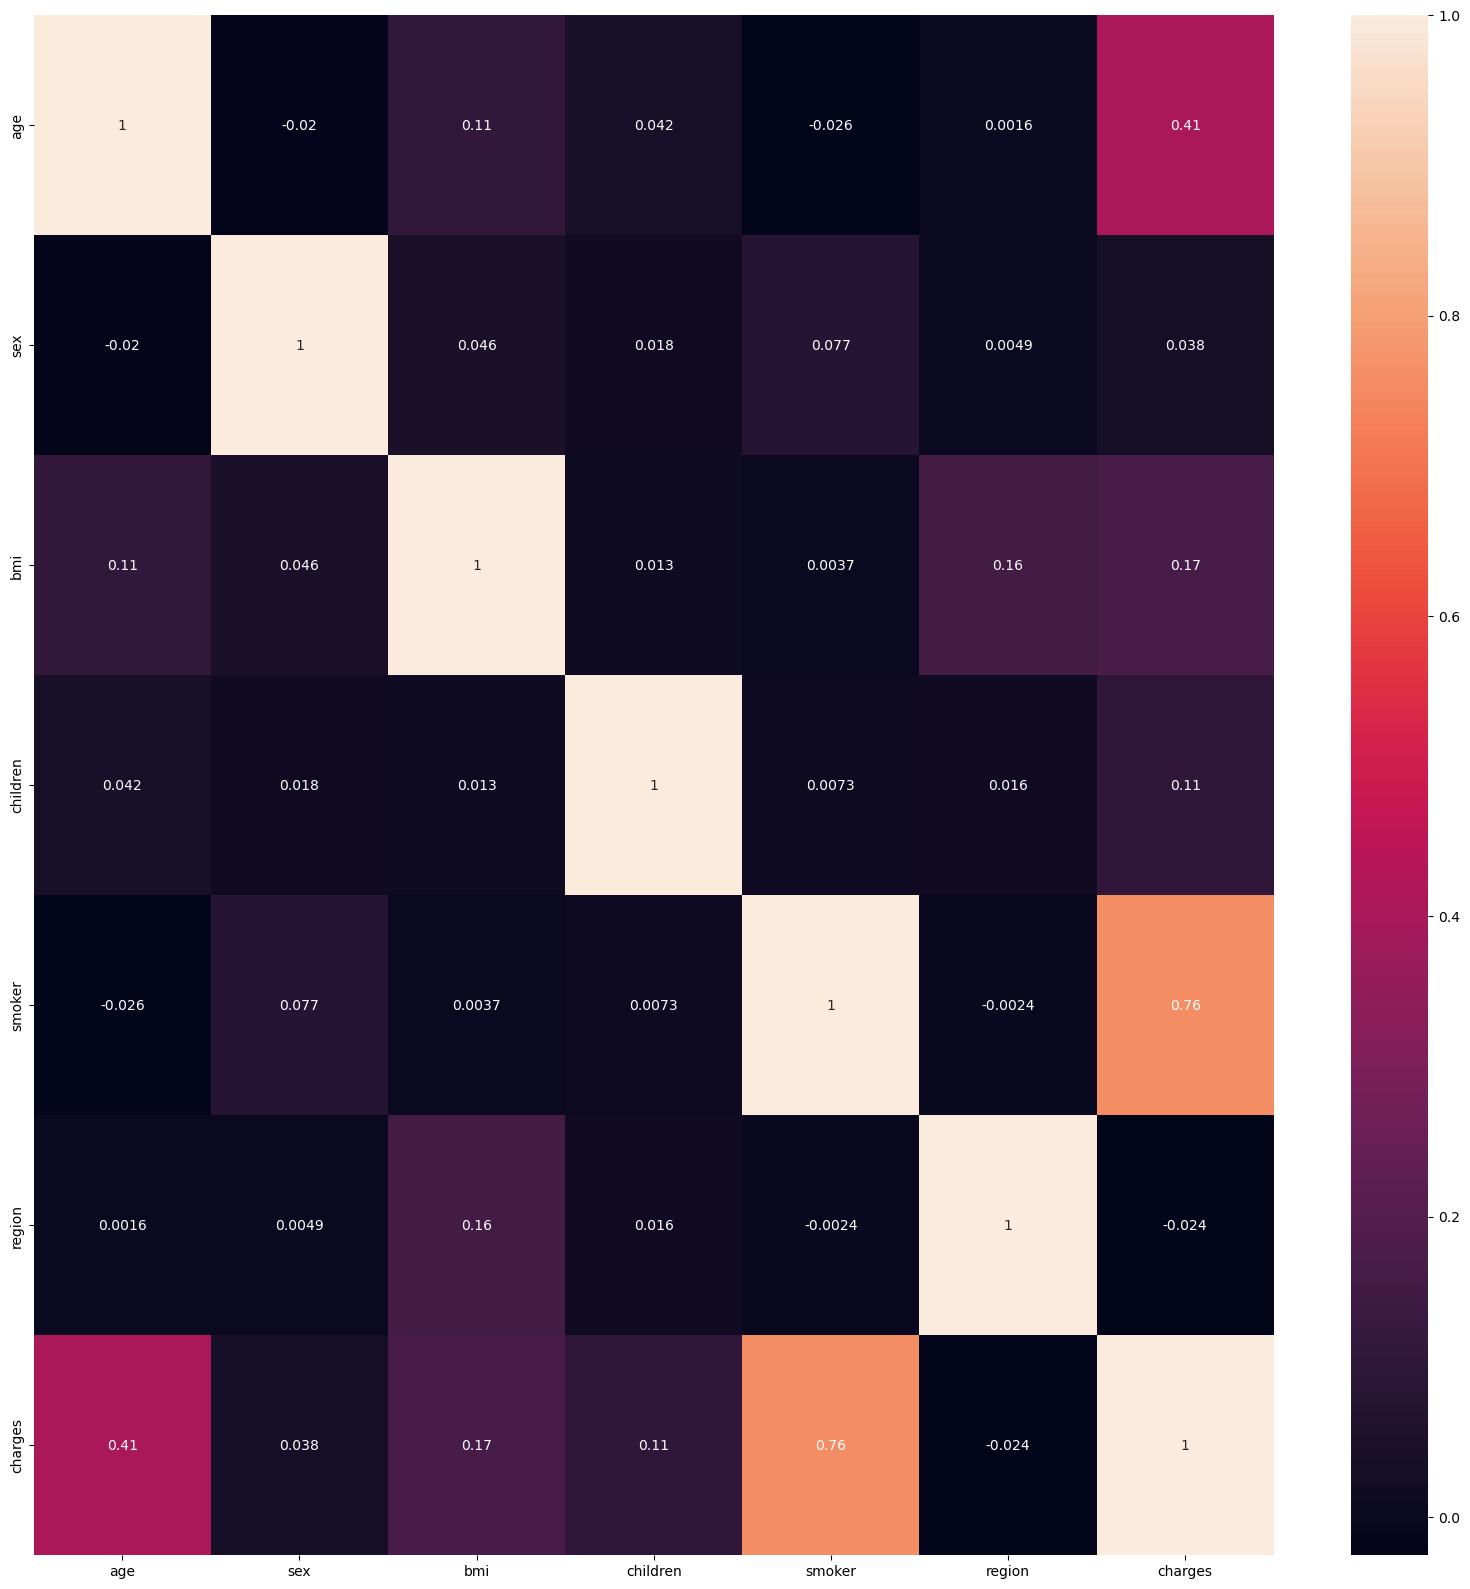

In [215]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

In [216]:
cor['charges'].sort_values()

region     -0.023931
sex         0.037950
children    0.106222
bmi         0.167888
age         0.409672
smoker      0.756065
charges     1.000000
Name: charges, dtype: float64

In [217]:
#we observe that 
#chrges is positively correlated with every feature except with region it is negativly correlated

In [218]:
x=df.drop('charges',axis=1)
y=df['charges']

In [219]:
#Applying min amx scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,1.343163
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.580143,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-0.909234,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-0.909234,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-0.909234,-0.507702,1.343163


In [220]:
##checking for Multicollinearity in dS using VIF values

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vi
vif=pd.DataFrame()
vif['columns']=x.columns
vif['Vif values']=[vi(x.values,i) for i in range(len(x.columns))]

In [222]:
vif

,columns,Vif values
0,age,1.015323
1,sex,1.008923
2,bmi,1.040634
3,children,1.002412
4,smoker,1.006557
5,region,1.025976


In [223]:
#Dropping region column as it is negatively correlated with other columns 

In [224]:
df.drop('region',axis=1,inplace=True)

In [225]:
df.shape

(1337, 6)

In [226]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [227]:
#checking vif again
from statsmodels.stats.outliers_influence import variance_inflation_factor as vi
vif=pd.DataFrame()
vif['columns']=x.columns
vif['Vif values']=[vi(x.values,i) for i in range(len(x.columns))]


In [228]:
vif

,columns,Vif values
0,age,1.015323
1,sex,1.008923
2,bmi,1.040634
3,children,1.002412
4,smoker,1.006557
5,region,1.025976


In [229]:
df.drop('bmi',axis=1,inplace=True)

In [230]:
y.value_counts()


129.942002    1
46.014550     1
47.133475     1
140.705560    1
114.297345    1
             ..
85.703466     1
161.583814    1
168.190064    1
33.902742     1
170.708407    1
Name: charges, Length: 1337, dtype: int64

In [231]:
#As we observe that target variable holds continous data ,also no of unique valuess rae more
#it is a Regression Problem

Machine Learning Model

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

In [233]:
#fing random state at which we get maximum accuracy
lr=LinearRegression()
maxacc=0
maxrs=0
for i in range(201):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
        
print('Max accuracy is',maxacc,'at random state',i)

Max accuracy is 0.832249815207458 at random state 200


In [234]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=200)

In [235]:
#building LR model
lr=LinearRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.7628377148699409
absolute Eror 15.97024898320718
Squared Error 572.6156233199507


In [236]:
#building Lasso model
l=Lasso()
l.fit(x_train,y_train)
ypred=l.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.761139014978608
absolute Eror 16.17390430303964
Squared Error 576.7170431413007


In [237]:
#building Ridge model
rd=Ridge()
rd.fit(x_train,y_train)
ypred=rd.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.7628535041505781
absolute Eror 15.980774801614087
Squared Error 572.577500948306


In [238]:
#building SVR model
svr=SVR()
svr.fit(x_train,y_train)
ypred=svr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.5710729005849984
absolute Eror 18.340567952893302
Squared Error 1035.6214870153053


In [239]:
##GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
ypred=gbr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))


Accuarcy score 0.8267602770257504
absolute Eror 10.91961988773962
Squared Error 418.27802384462046


In [240]:
#building EN model
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
ypred=en.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.6711111680004217
absolute Eror 20.53311344495356
Squared Error 794.0844533317393


In [241]:
#building DTR model
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
ypred=dtr.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))

Accuarcy score 0.7363996547187285
absolute Eror 11.564031192775275
Squared Error 636.4489022266486


In [242]:
##From above we conclude that gradientboostingRegression provides Highest accuracy
#lets check the cross val score for the models before selecting final model

In [243]:
from sklearn.model_selection import cross_val_score

##LR

score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.80167804 0.71149957 0.82440715 0.76619544 0.77352206]
0.7754604518440228
Difference between r2score and crossvalscore is -3.906079712529431


In [244]:
##GradientBoostingRegressor
score=cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)


[0.86403247 0.75586982 0.89347893 0.8343165  0.83659916]
0.8368593761479964
Difference between r2score and crossvalscore is -10.045972142926797


In [245]:
##Lasso

score=cross_val_score(l,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.80029286 0.71628616 0.81381275 0.76331909 0.77288465]
0.7733191031997856
Difference between r2score and crossvalscore is -3.6919448481057104


In [246]:
##Ridge

score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.80165438 0.71162903 0.82428007 0.76624179 0.7735155 ]
0.7754641533876849
Difference between r2score and crossvalscore is -3.906449866895645


In [247]:
##svr

score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.6703292  0.59119569 0.66761006 0.63378875 0.61577648]
0.6357400366540552
Difference between r2score and crossvalscore is 10.065961806467328


In [248]:
##DTR

score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.73875002 0.64430904 0.65343292 0.68980628 0.63205234]
0.6716701188839288
Difference between r2score and crossvalscore is 6.472953583479968


In [249]:
##LR

score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)

[0.80167804 0.71149957 0.82440715 0.76619544 0.77352206]
0.7754604518440228
Difference between r2score and crossvalscore is -3.906079712529431


In [250]:
##ElaasticNet

score=cross_val_score(en,x,y)
print(score)
print(score.mean())
print('Difference between r2score and crossvalscore is',(r2_score(y_test,ypred)-score.mean())*100)##LR



[0.69745745 0.657173   0.69697431 0.68202273 0.67972926]
0.6826713512267325
Difference between r2score and crossvalscore is 5.372830349199598


##From above we  conclude that GRADIENT BOOSTING REGRESSION PERFORMS BEST GIVING BEST ACCURACY SCORE

In [251]:
from sklearn.model_selection import GridSearchCV

In [252]:
parameters={'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }


gcv=GridSearchCV(gbr,parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [253]:
gcv.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}

In [254]:
#Finally building model using best parameters

In [255]:
gbrmodel=GradientBoostingRegressor(learning_rate= 0.03, max_depth= 4, n_estimators=100, subsample= 0.5)

gbrmodel.fit(x_train,y_train)
ypred=gbrmodel.predict(x_test)
print('Accuarcy score',r2_score(y_test,ypred))
print('absolute Eror',mean_absolute_error(y_test,ypred))

print('Squared Error',mean_squared_error(y_test,ypred))


Accuarcy score 0.8323019615080183
absolute Eror 11.28916736940374
Squared Error 404.8979237485358


<Axes: xlabel='charges'>

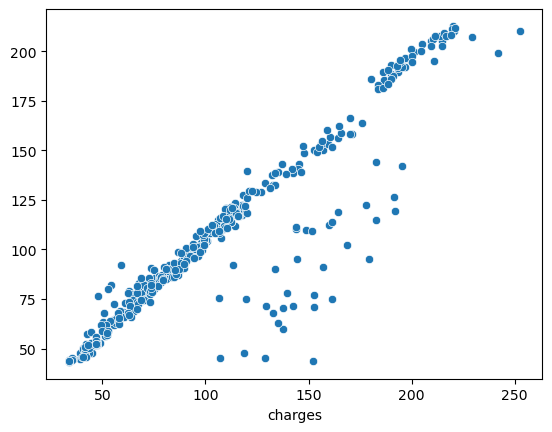

In [256]:
sns.scatterplot(x=y_test,y=ypred)

In [257]:
import joblib
joblib.dump(gbrmodel,'insurance_predict_Gradienboostingregressor.pkl')

['insurance_predict_Gradienboostingregressor.pkl']

In [258]:
model=joblib.load('insurance_predict_Gradienboostingregressor.pkl')
prediction=model.predict(x_test)

In [259]:
prediction

array([ 78.97989213,  76.58866589, 185.74595332, 189.48097018,
        73.1101702 ,  52.70813909, 210.48368239,  50.51115857,
       195.28751936,  90.47371583,  87.17468262, 110.87609871,
        80.31112727, 111.78824072, 158.41337002,  70.88909658,
       127.71060746, 188.3760681 ,  94.08701437,  89.97920784,
        82.6897441 ,  43.58277978,  98.51592505, 102.14138056,
        82.57932922,  97.42324972,  85.72121956, 191.44095038,
       122.59687509, 212.81429937, 113.88483962, 117.77766018,
        76.03190719,  78.19134189,  47.59058987,  98.76334899,
       113.78986903,  47.72160307,  89.48760301, 189.45423197,
       117.50144575, 205.1802824 ,  79.20873378, 199.88744597,
        95.65799349, 112.90248181, 113.55885003,  82.2896378 ,
       109.95392164, 150.02574811, 150.06002839,  89.60338042,
       122.56554702, 207.64218134, 119.08536174, 209.44763064,
       106.79218888,  63.47845461, 196.75792269,  52.49745161,
        78.08346592,  86.52142828, 119.840362  ,  63.91

In [260]:
predictiondf=pd.DataFrame()
predictiondf['actual test results']=y_test
predictiondf['predicted test results']=prediction

In [261]:
predictiondf

,actual test results,predicted test results
993,74.057189,78.979892
938,48.000023,76.588666
689,186.564916,185.745953
1186,193.559665,189.480970
1138,60.863409,73.110170
...,...,...
846,99.361466,102.286750
1087,106.551526,109.269700
523,73.468474,82.224142
878,79.260551,84.815408
